# 군집화 Kaggle 실습

In [10]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('/content/drive/MyDrive/EURON/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


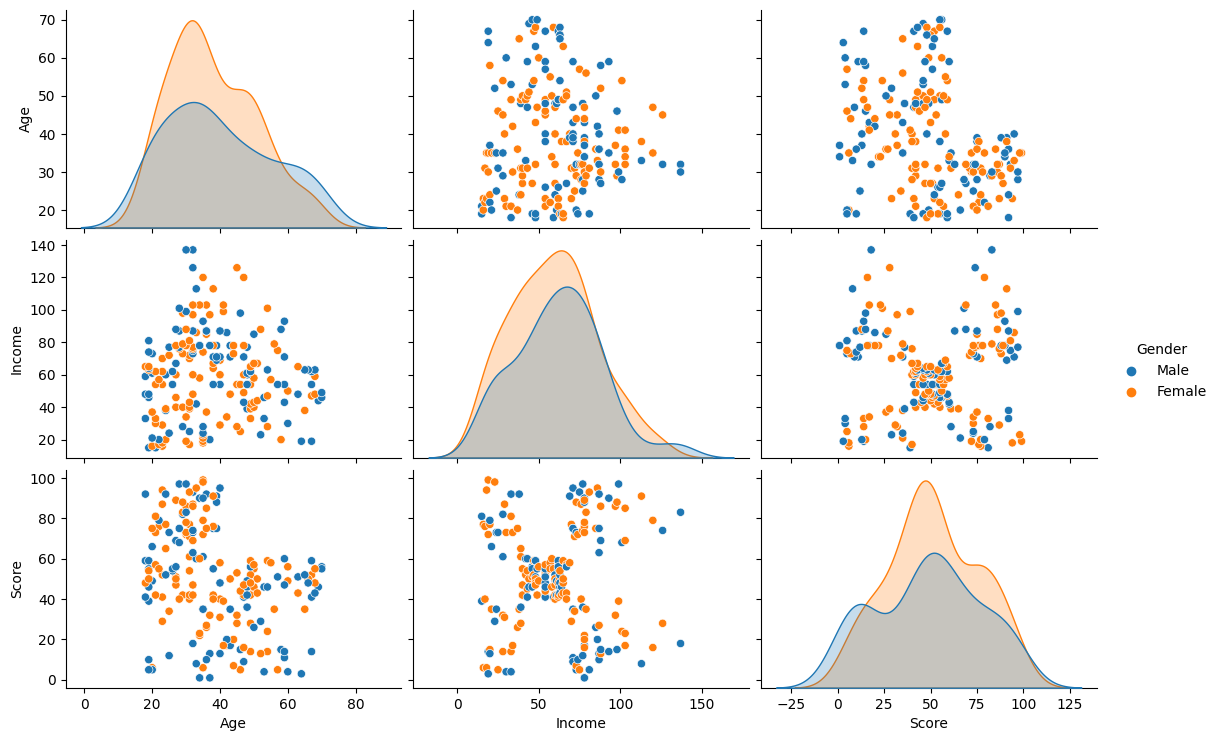

In [14]:
# pairplot을 이용해서 데이터의 디테일 살펴보기
X = df.drop(['CustomerID', 'Gender'], axis=1)
# 성별에 따른 분포도를 비교하기 위해 각 성별에 대해 다른 색으로 구분한 산점도 출력
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

- plot 해석
    - **성별은 고객을 세분화하는 데 직접적인 관련이 없다.**
    - 성별과 customerID 열을 없앤 X 매개변수를 사용해 계속 진행

## KMeans
- Elbow Method
 - Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 이 지점의 K 값을 군집의 개수로 사용.
 - inertia_ 속성으로 확인할 수 있다.

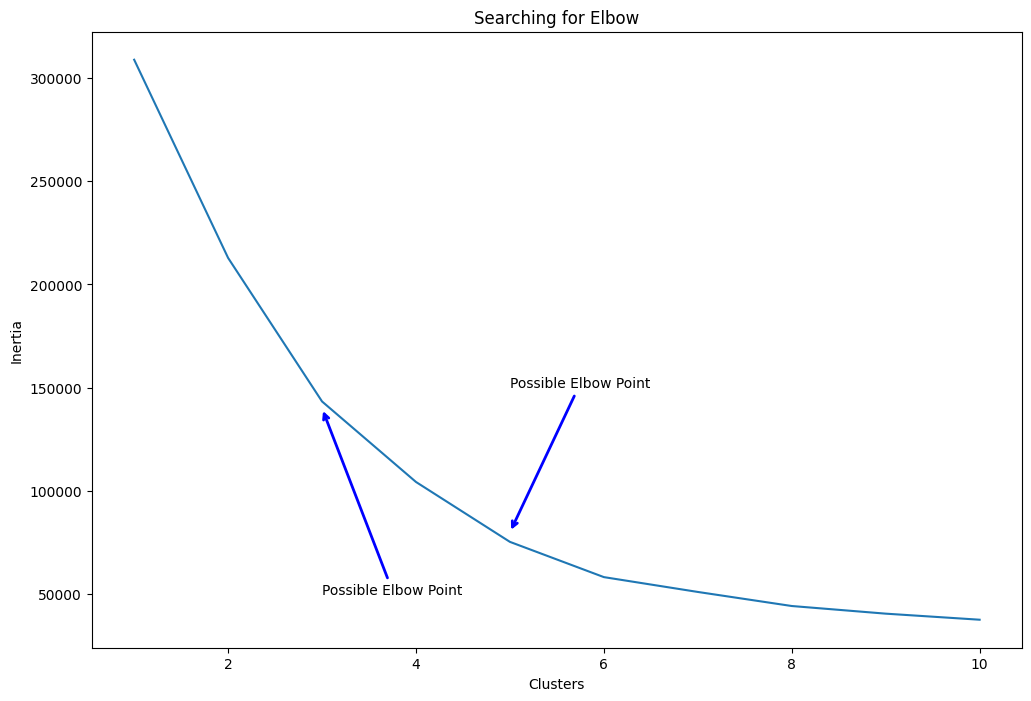

In [15]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

- 클러스터 개수에 따른 Inertia 값을 선 그래프를 통해 나타냈다.
- Plot 해석
 - 클러스터 개수가 늘어남에 따라 Inertia가 감소하는데, 이 감소폭이 급격해지는 지점이 'Elbow'로 간주되어 적절한 클러스터 개수로 선택됨.
 - 위 그래프에서는 3, 5 중 하나라고 볼 수 있음.

## Creating the Visual Plots

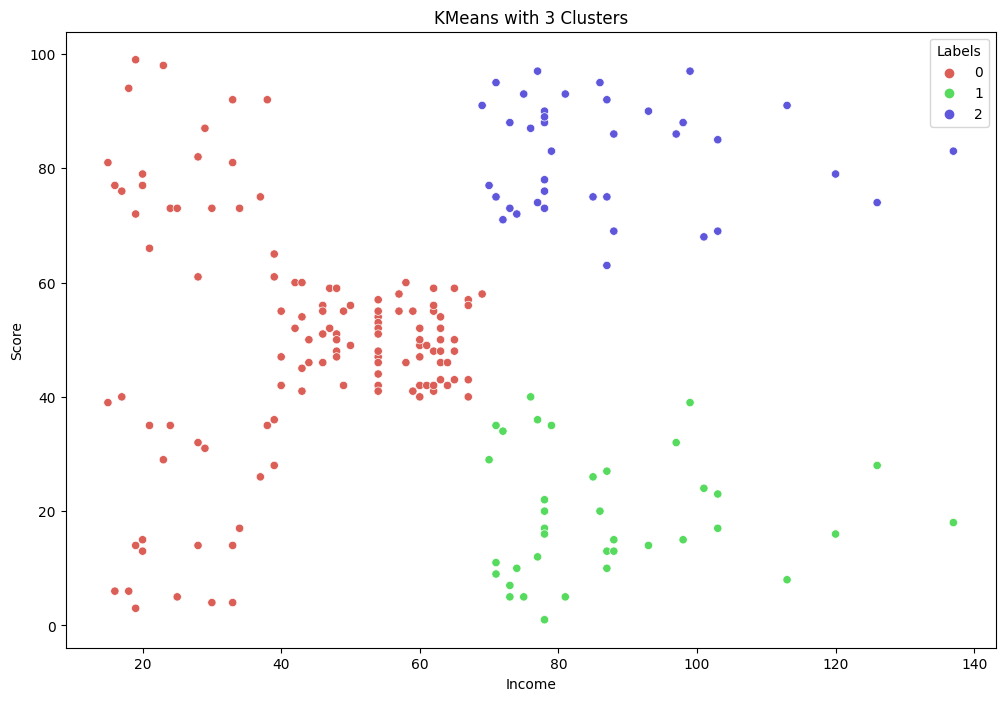

In [19]:
# 군집 개수 = 3
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

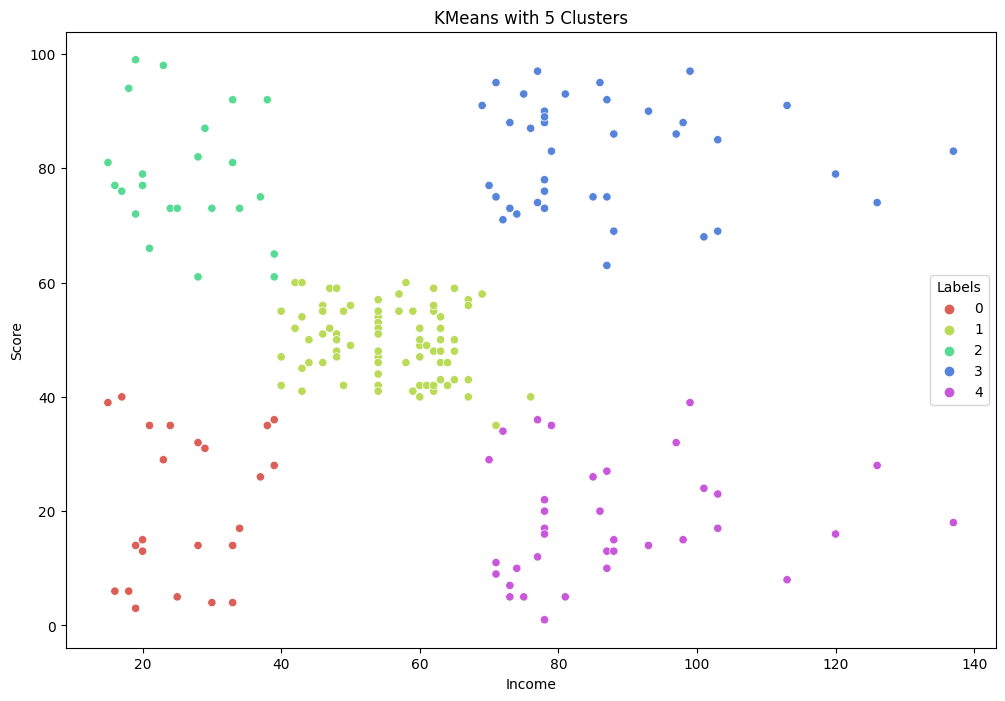

In [20]:
# 군집 개수 = 5
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

- 군집 개수가 5개인 경우가 3개인 경우보다 낫다. => 5개 클러스터 선택

- 레이블 분석
 - **레이블 0**은 소득과 소비가 모두 낮은 그룹입니다.
 - **레이블 1**은 소득과 소비가 모두 높은 그룹입니다.
 - **레이블 2**는 중간 수준의 소득과 소비를 가진 그룹입니다.
 - **레이블 3**은 소득은 높지만 소비는 낮은 그룹입니다.
 - **레이블 4**는 소득은 낮지만 소비는 높은 그룹입니다.

## swarm plot
- 더 명확한 분석을 위해 swarm plot 활용

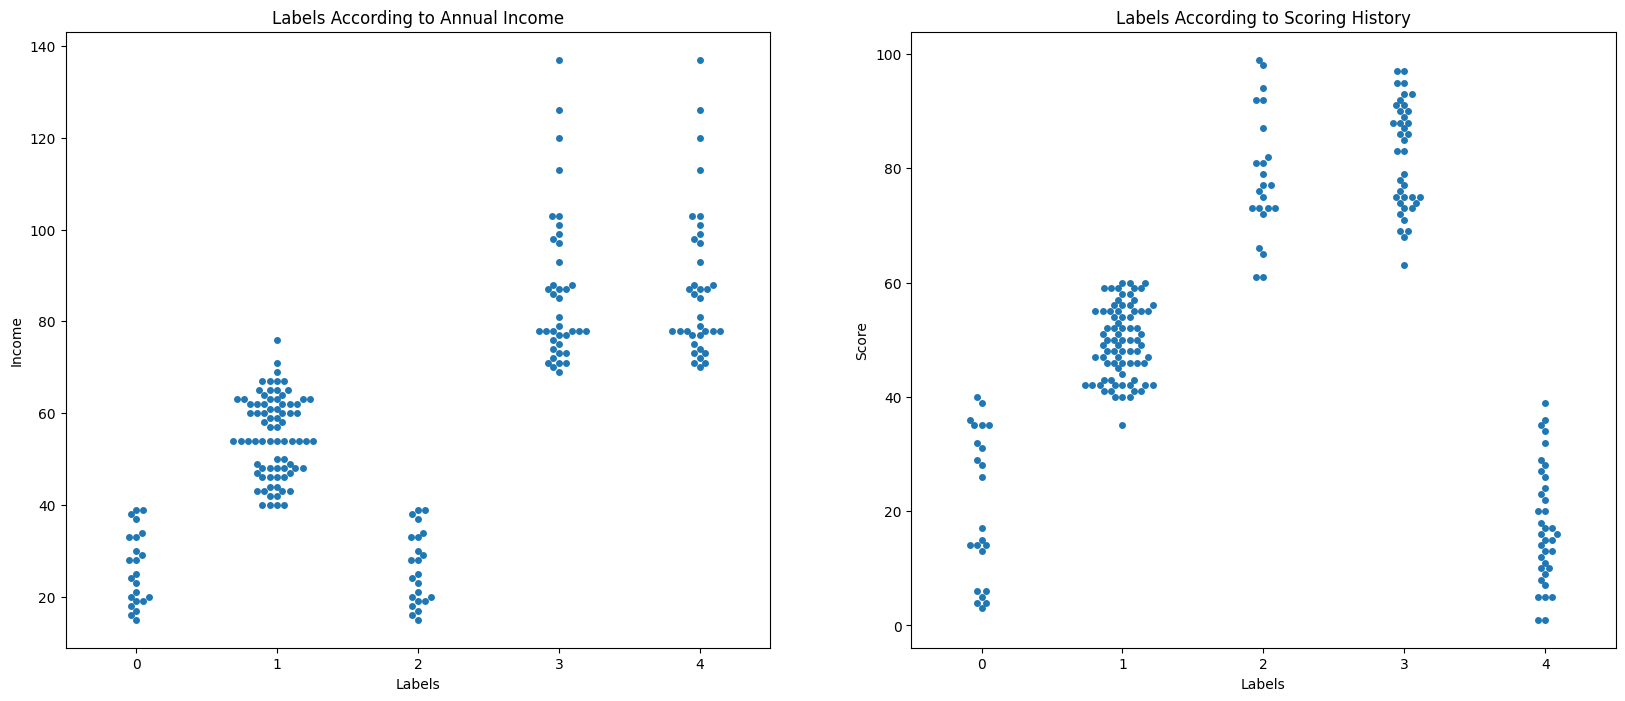

In [21]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

- 군집별로 수입/소비 분포 산점도를 그려서 분포를 확인.
=> 각 군집별로 구분이 명확하므로 군집화가 잘 이루어졌다.

## 계층적 군집(Hierarchical Clustering)
- 계층적 트리 모형을 이용하여 순차적, 계층적으로 유사한 클러스터끼리 통합하여 최종적으로 하나의 군집이 될 때까지 군집화.
- K-Means와 다르게 군집 수를 사전에 정하지 않아도 학습 수행이 가능하다.

- 응집형 군집(Agglomerative clustering)
 - Bottom-up 방식(상향식)
 - 거리가 가까운 개체들을 합병하는 방법으로 군집화를 진행한다.
 - 반복적으로 두 개의 가까운 클러스터를 찾으며, 모든 데이터가 하나의 군집으로 묶일 때까지 반복한다.
 <br><br>

- **응집 기법의 종류**
1. **최단 연결법(Single Linkage Method)**: 가장 가까운 두 개체를 묶은 군집을 생성한 뒤, 가장 가까운 군집 두 개를 묶어 주는 방법입니다. 이상치들도 가장 가까운 개체와 묶일 수 있기 때문에 하기 때문에 이상치에 취약하다는 단점이 있습니다.
2. **최장 연결법()Complete Linkage Method)**: 가장 가까운 두 개체를 묶은 군집을 생성한 뒤, 가장 먼 군집 두 개를 묶어 주는 방법입니다. 최단연결법과 동일하게 이상치에 취약합니다.
3. **평균 연결법(Average Linkage Method)**: 가장 가까운 두 개체를 묶은 군집을 생성한 뒤, 각각 군집의 모든 개체들의 거리의 평균을 두 군집간의 거리로 두고 가장 가까운 군집 두 개를 묶어 주는 방법입니다.
최단, 최장 연결법과 동일하게 이상치에 취약하며 모든 거리의 평균을 계산해야 하므로 시간이 오래걸린다는 단점이 있습니다.
4. **중심 연결법(Centroid Linkage Method)**: 가장 가까운 두 개체를 묶은 군집을 생성한 뒤, 각 군집의 내부 중심과 다른 군집의 내부 중심 간 거리를 계산하여 가장 가까운 군집 두 개를 묶어주는 방법입니다. 평균 연결법과 동일하게 계산량이 많습니다.
5. **Wards 연결법(Ward Linkage Method)**: 가장 가까운 두 개체를 묶은 군집을 생성한 뒤, 두 군집이 합쳐졌을 때 생기는 오차제곱의 합(SSE)이 최소가 되는 군집끼리 묶어주는 방법입니다. 두 개의 군집을 하나로 묶을 때 생기는 정보 손실을 최소화하는 방법으로 오차제곱합을 고려하기 때문에 이상치에 덜 취약하며 크기가 비슷한 크기의 군집끼리 병합되는 특성이 있습니다.

=> 아래 데이터에는 **최장 연결법**을 사용하여 군집화를 수행한다.

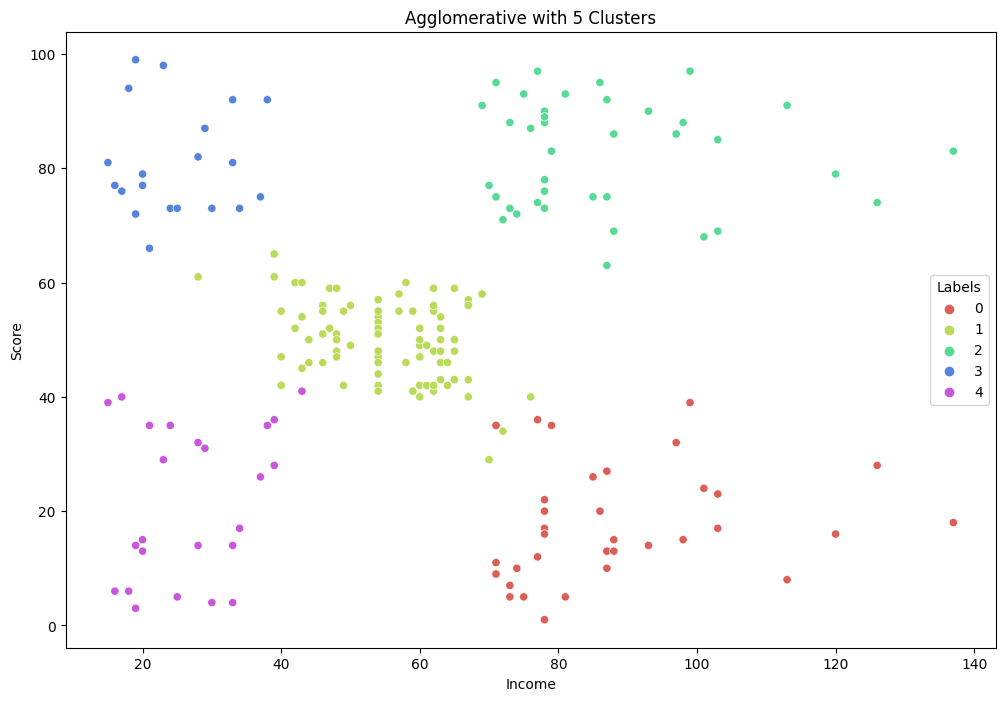

In [23]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

## 덴드로그램(Dendrogram)

1. 모든 데이터 포인트 간의 거리를 계산한 거리행렬 계산

In [24]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


2. linkage 함수 파라미터로 거리행렬과 병합방식('complete') 전달

In [25]:
Z = hierarchy.linkage(dist, 'complete')

3. 덴드로그램 그리기

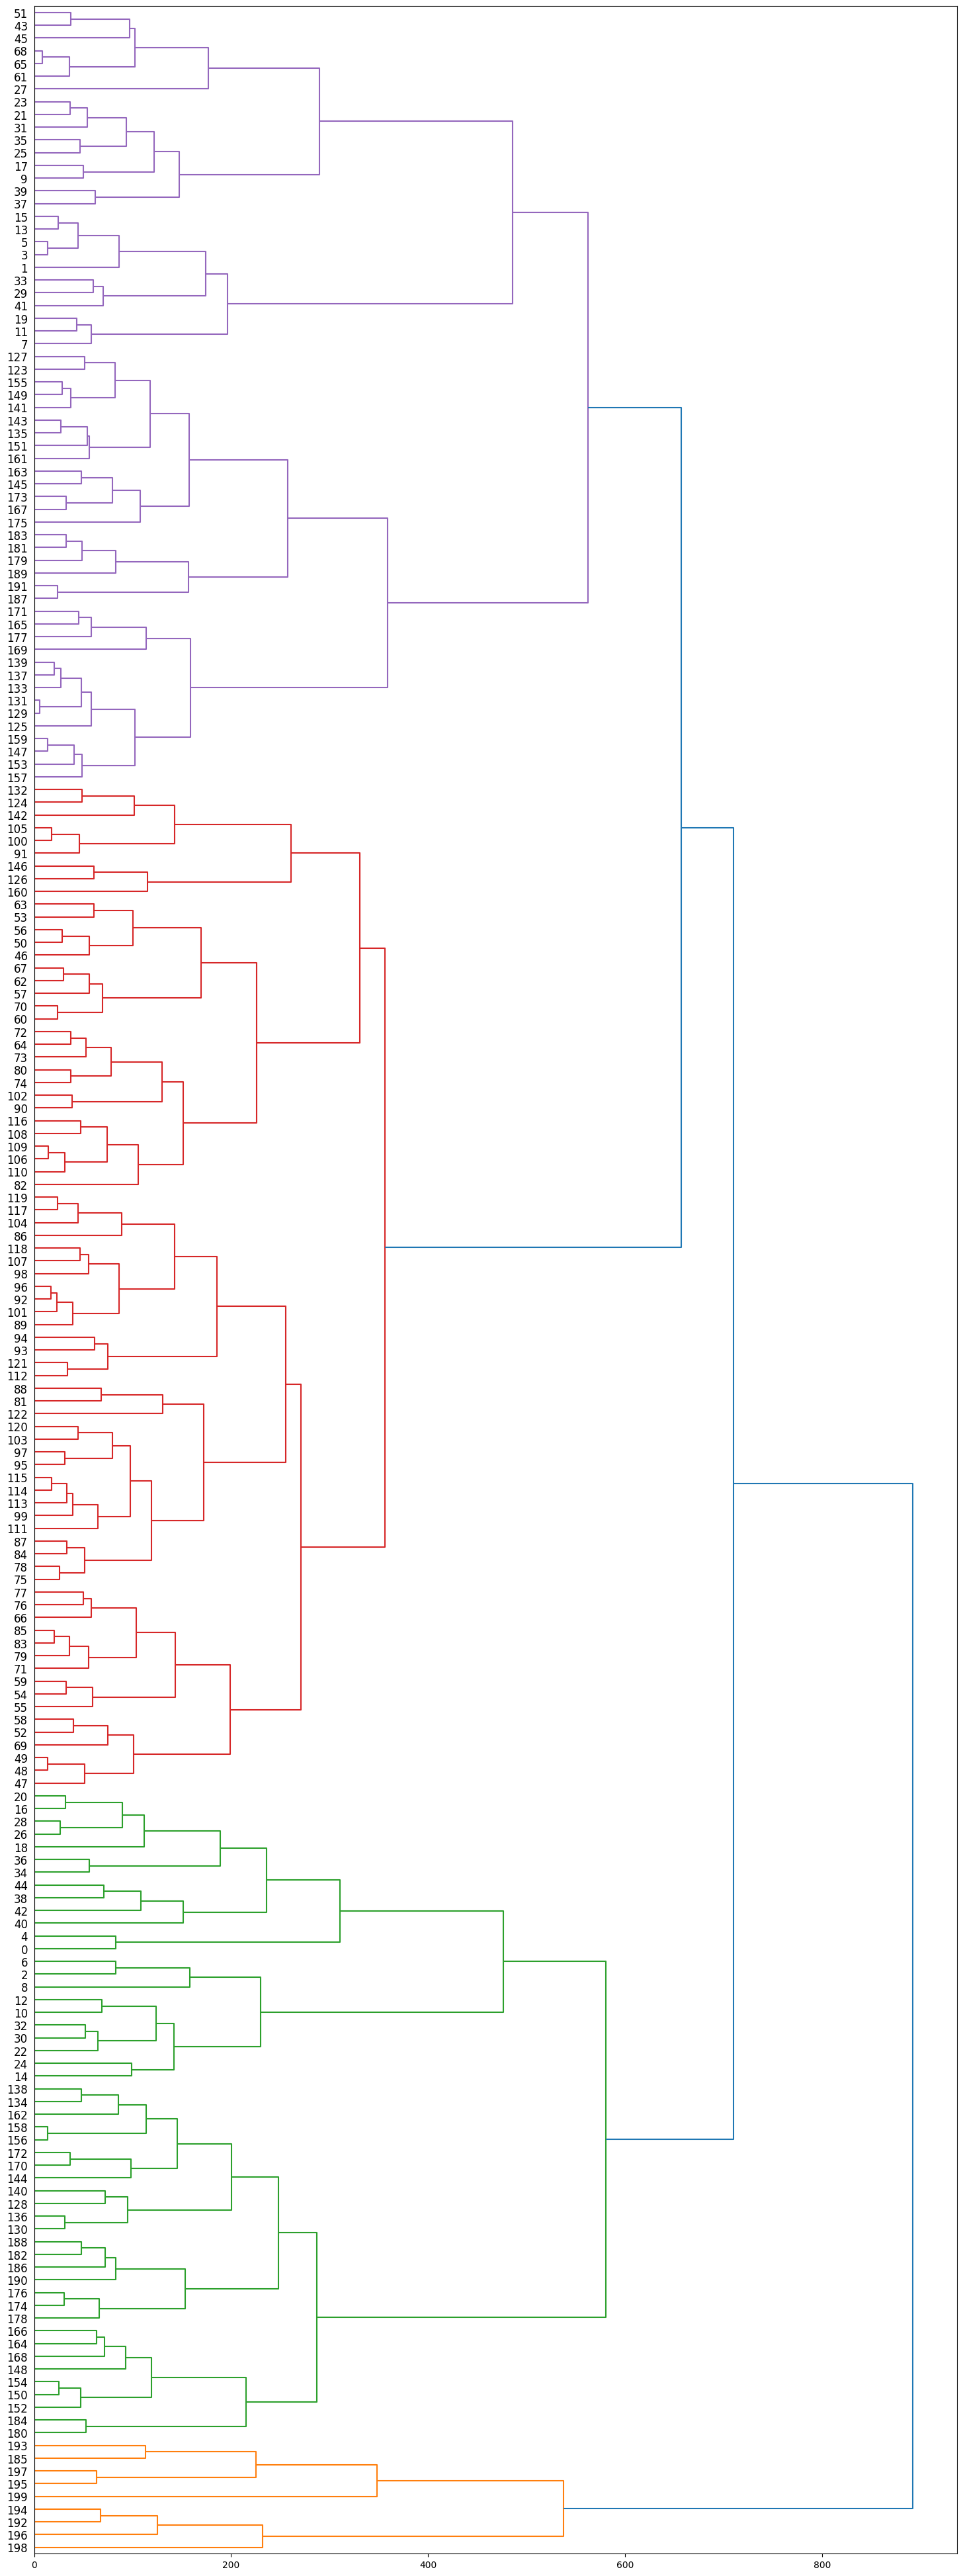

In [26]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

(+) 동일한 방식으로 병합방식만 'average'로 설정

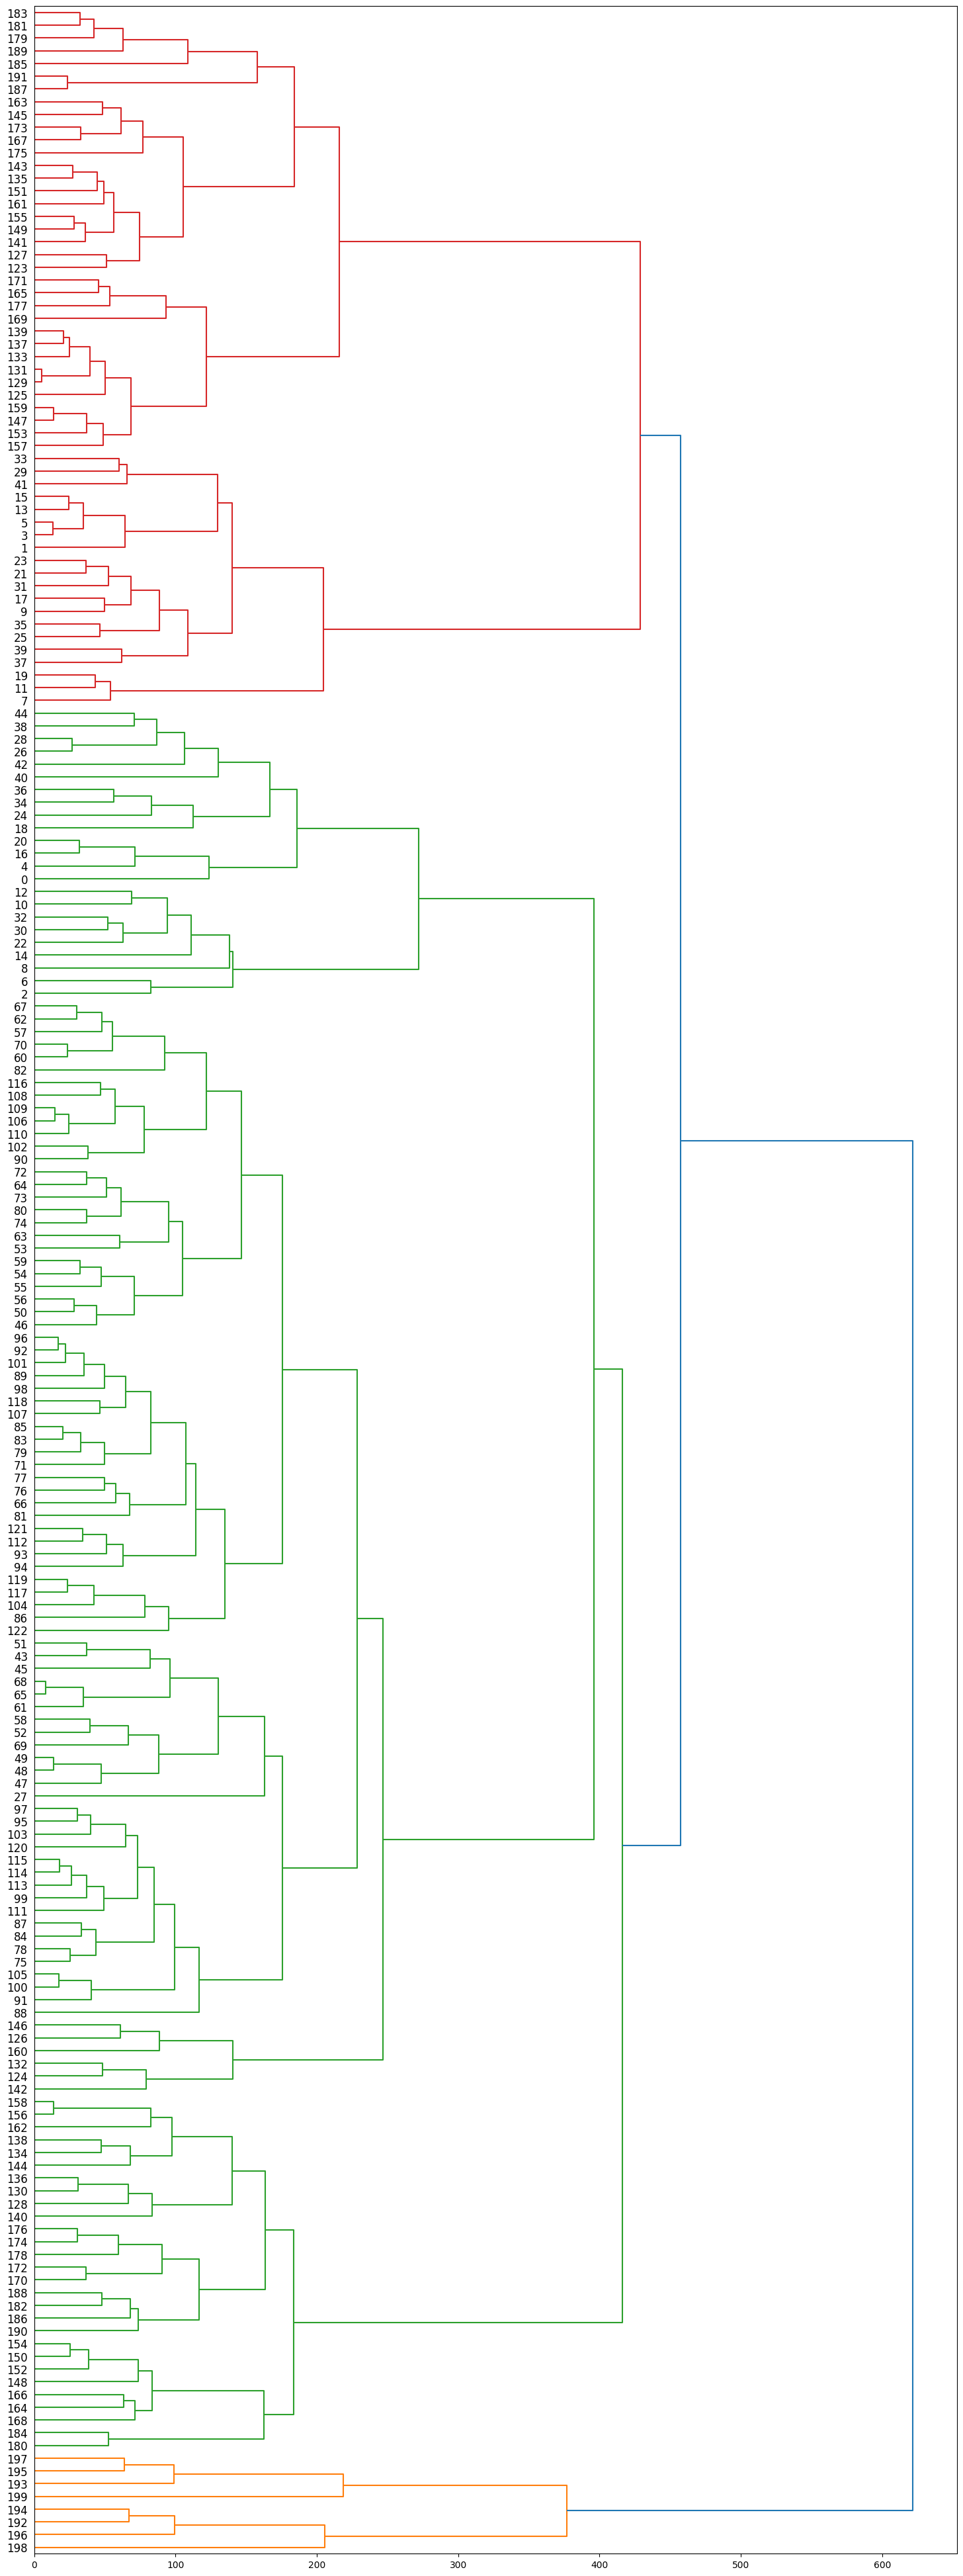

In [27]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## DBSCAN
- 어느 점을 기준으로 반경 x 내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식.
- 밀도 기반 작동 알고리즘.

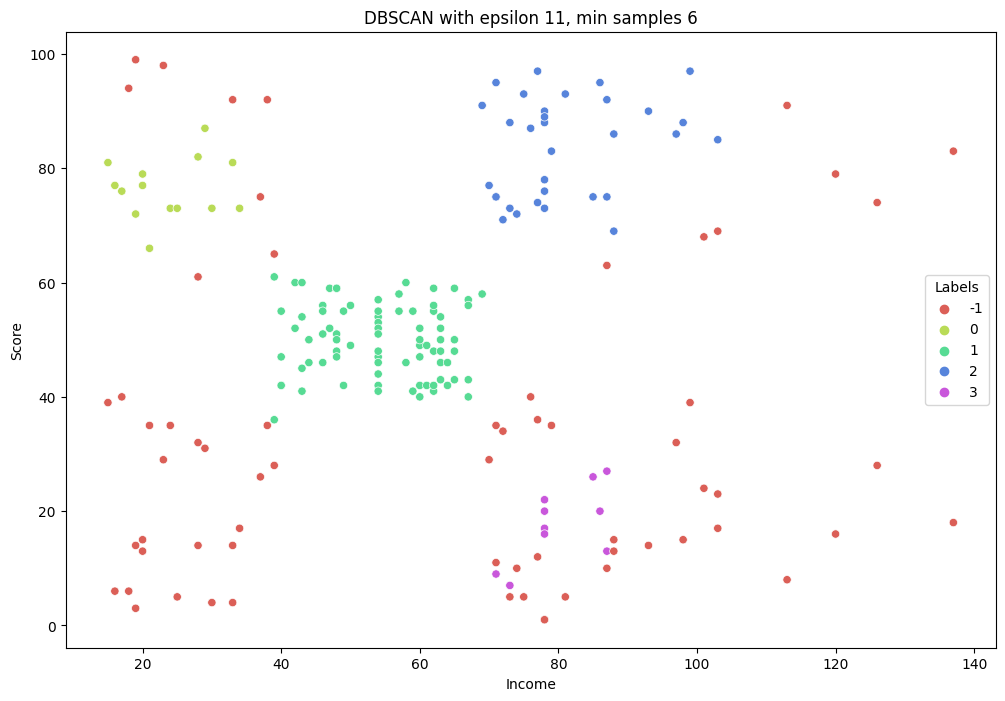

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

- 결과 해석
 - DBSCAN은 밀도 기반으로 작동하는데, 데이터의 밀도가 높지 않아서 성능이 좋지 않게 나왔다.
 - 레이블 -1은 이상치를 의미하는데 이상치가 가장 많다.
 - 만약 더 큰 데이터로 측정했다면 성능이 더 좋았을 것이다.

## 평균 이동(MeanShift)
- K-Means : 소속된 데이터의 평균 거리 중심으로 이동
- 평균 이동 : 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

- 평균 이동의 가장 중요한 파라미터는 bandwidth(대역폭)이므로 estimate_bandwidth()를 이용하여 최적의 bandwidth를 찾아준다.
- quantile: 해당 비율만큼의 데이터 건수로 KNN 수행
- 일반적으로 quantile이 크면 bandwidth의 값이 커져서 클러스터 개수가 작아진다.

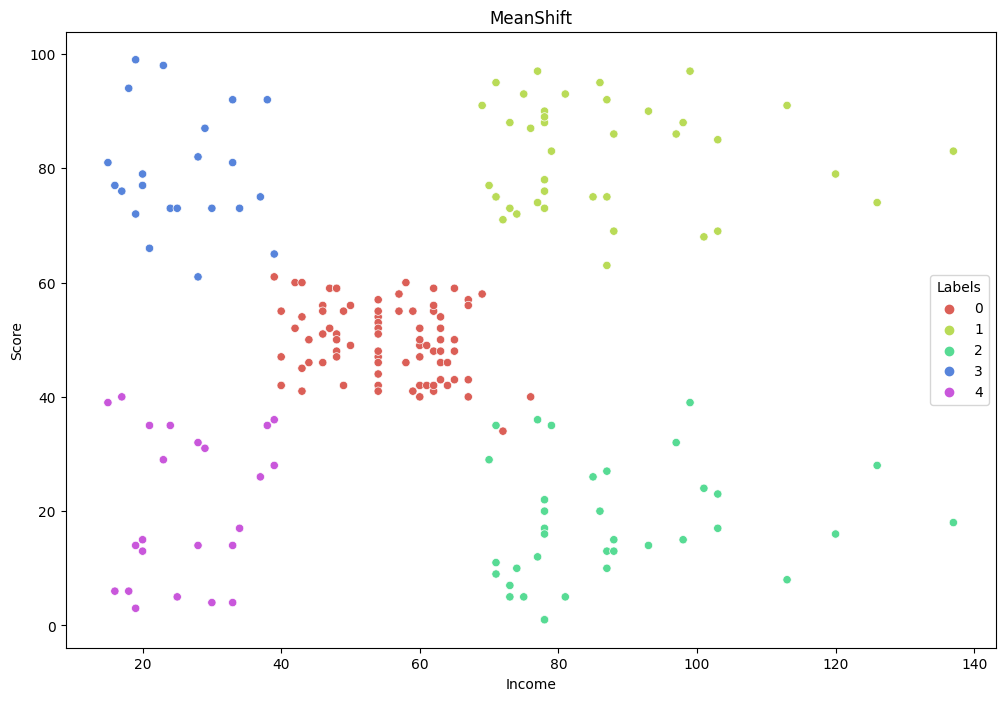

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
best_bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=best_bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

## 전체 시각화

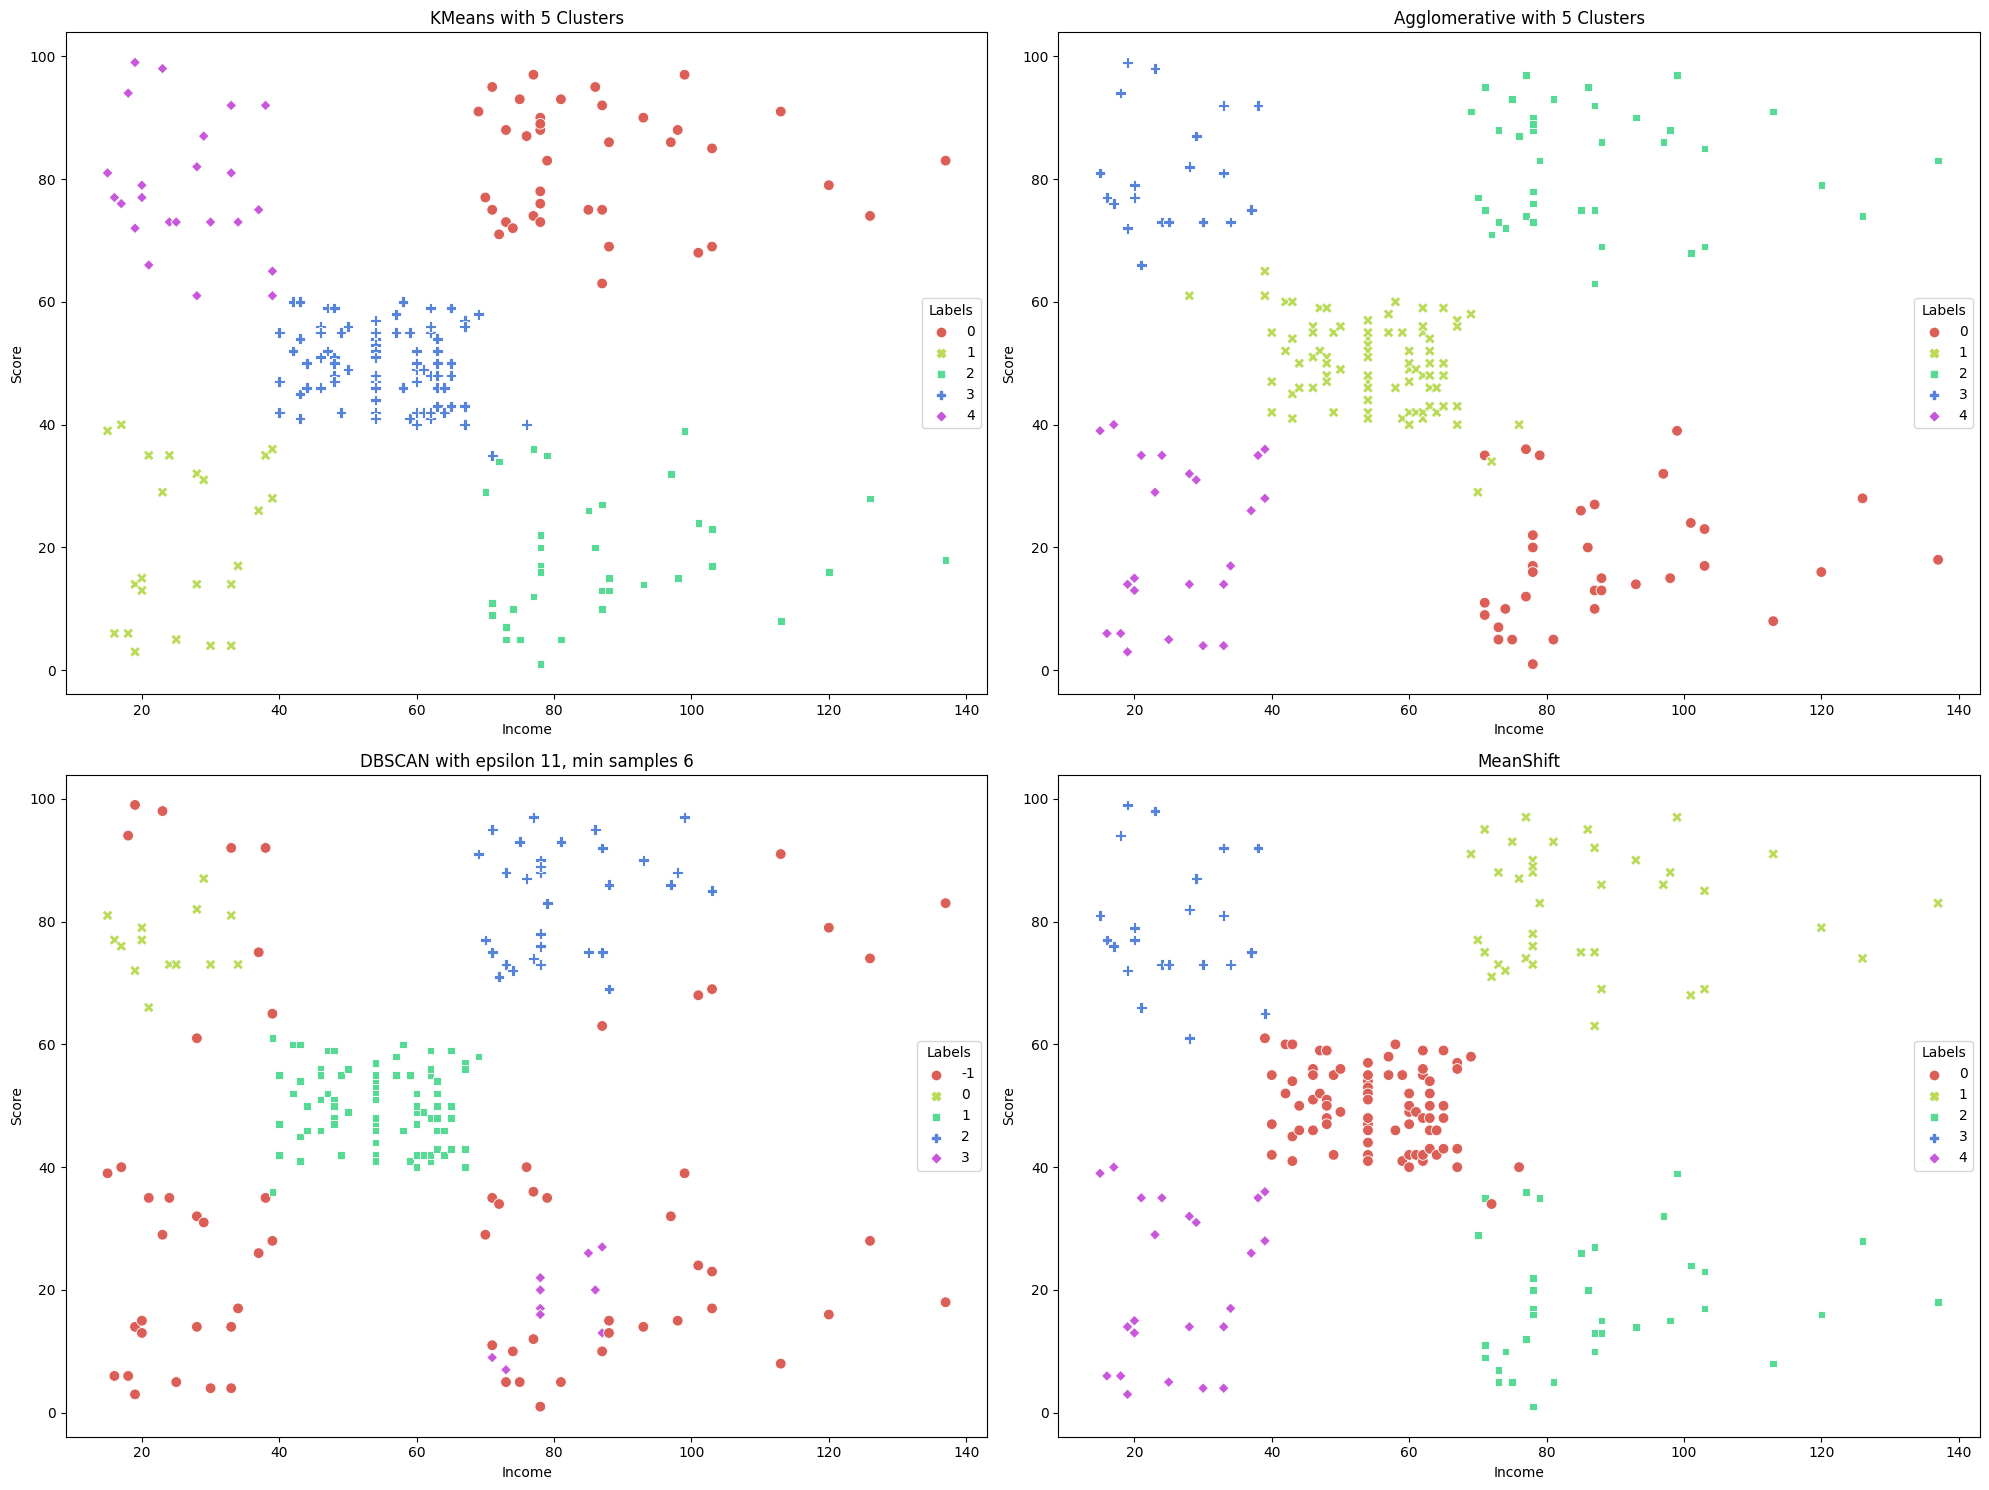

In [34]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

best_bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=best_bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()